In [9]:
from bb84 import BB84
import numpy as np
import matplotlib.pyplot as plt
from math import comb

# No attack

In [10]:
protocol = BB84()
N = 10_000
failures = []

lengths = list(range(1, 25))

for length in lengths:
    protocol.length = length

    tmp = []
    for i in range(N):
        is_failed = protocol.run(is_attack=False)
        protocol.clear()
        tmp.append(is_failed)

    failures.append(sum(tmp))



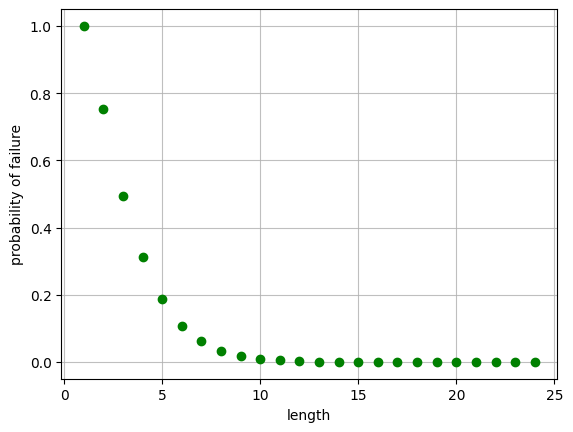

In [11]:
plt.scatter(lengths, np.array(failures) / N, c='g', zorder=2, label="Simulation")
# plt.scatter(lengths, [1/2**N +N/2**N for N in lengths], marker='x', c='r', zorder=3, label="Exact")
plt.grid(alpha=0.8, zorder=1)
# plt.title("Probability of failure with no attack\nfor different message lengths")
plt.xlabel("length")
plt.ylabel("probability of failure")
# plt.legend()

plt.savefig("figures/b_no_attack_failure.pdf")
plt.show()

# Attack

In [12]:
from bb84 import BB84
import numpy as np
import matplotlib.pyplot as plt
from math import comb

protocol = BB84()
N_ATTACK = 10_000
failures_attack = []

# lengths_attack = list(range(1, 50, 5))
lengths_attack = list(range(1, 25, 1))

for length in lengths_attack:
    protocol.length = length

    tmp = []
    for i in range(N_ATTACK):
        is_failed = protocol.run(is_attack=True)
        protocol.clear()
        tmp.append(is_failed)
    
    # Pnf = protocol.c/N_ATTACK
    # print(Pnf, Pnf / ((1/2)**length* comb(length, 1)))
    # protocol.c = 0

    failures_attack.append(sum(tmp))



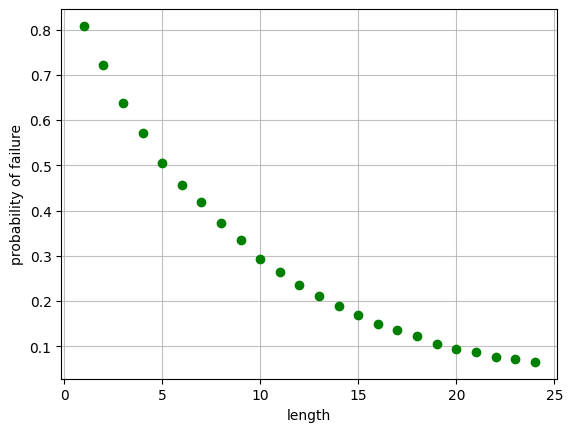

In [13]:
plt.scatter(lengths_attack, np.array(failures_attack) / N_ATTACK, c='g', zorder=2)
# plt.scatter(lengths_attack, probs, marker='x', c='r', zorder=3, label="Exact")

plt.grid(alpha=0.8, zorder=1)
# plt.title("Probability of failure with attack\nfor different message lengths")
plt.xlabel("length")
plt.ylabel("probability of failure")
# plt.savefig("figures/b_with_attack_failure.pdf")
plt.show()